<strong>We will implement Naïve bayes Algorithm from scratch</strong>

- Naive bayes classifier is a **generative classifier**.

\begin{align} 
\text {posterior} &=& \frac{\text {prior} \times \text{likelihood} } { \text {evidence} }
\\ p(y|\mathbf x) &=& \frac{p(y) \times p(\mathbf x |y) }{p(\mathbf x)} 
\end{align}


![Image source](https://editor.analyticsvidhya.com/uploads/374484.png)

It is calles **Naïve** because it assumes all features are independent of eachother

* It simplifies the calculation of **likelihood** with **conditional independence assumption** i.e NB assumes that the features are conditionally independent.

    * The **likelihood** can be expressed as : 
    \begin{align} 
    p(\mathbf x| y) &=& p(x_1,x_2,\ldots,x_m|y) 
    \\&=& p(x_1|y) \ p(x_2|y) \ldots\ p(x_m|y) \\
    \end{align}

    \begin{align}
    &=& \prod_{j=1}^{m}p(x_j|y) 
    \end{align}


* Substituting likelihood in the Bayes theorem gives us the following formula :
    \begin{equation}
    p(y=y_c|\mathbf x)= \frac{p(y_c)\prod_{j=1}^{m}p(x_j|y_c)}{\sum_{r=1}^kp(y_r) \prod_{j=1}^{m}p(x_j|y_r)}
    \end{equation}

**Inference**

the label that results in highest value of numerator i.e. **likelihood $\times$ prior** is assigned to a given example.

In general :<br>
\begin{equation} 
y = \text {argmax}_y \log p(y) + \sum_{j=1}^{m}\log p(x_j|y)
\end{equation}

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time as time

# Bernoulli Naïve Bayes Implementation

**Parameter estimation** : Class conditional density and prior

Remember that the **class conditional density** for Bernoulli NB is calculated as follows:

\begin{equation} 
w_{y_c} = \frac{\sum_{i=1}^{n} \mathbb {1} (y^{(i)}=y_c)}{n} 
\end{equation} 

Here : 

The numerator gives us **total number of examples with label $y_c$ and is divided by the total number of examples in the training set**.

While estimating parameters of the model, we process examples from each label separately and estimate the parameters.

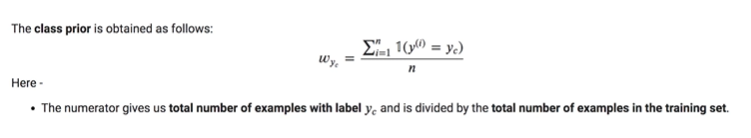

In [9]:
def fit(X, y):
    n_samples, n_features = X.shape
    class_count = np.unique(y) # array of unique features
    n_classes = len(class_count) # number of unique features

    # weight vector initialization
    w = np.zeros((n_classes, n_features), dtype=np.float64)
    w_prior = np.zeros(n_classes, dtype=np.float64)

    for c in range(n_classes):
        # get example with label = c
        X_c = X[y==c]

        # estimation of w_{jy_c}: The parameter of bernoulli separately.
        #  i.e P(x_j | y_c) ~ Ber(w_{jy_c})
        # We have vectorized this operation and we obtain vector w_{y_c} 
        # that contains w_{jy_c} for each x_j.

        w[c, :] = np.sum(X_c, axis=0)/X_c.shape[0] # add along row

        # estination of prior
        w_prior[c] = X_c.shape[0]/float(n_samples) # probab of finding elements of a certain class c

    print(f'Weight vector :\n {w}')
    print(f'Prior :\n {w_prior}')
    return w, w_prior

    

Test the above function

In [10]:
# feature matrix with shape (4,2). x_1 ~ Ber(w_1), x_2~ Ber(w_2)
X = np.array([[1, 0], [0, 1], [0, 1], [1, 0]])

# label vector with shape(4,)
y = np.array([1, 0, 0, 1])

fit(X, y)

Weight vector :
 [[0. 1.]
 [1. 0.]]
Prior :
 [0.5 0.5]


(array([[0., 1.],
        [1., 0.]]), array([0.5, 0.5]))

 **STEP 1** : Filter examples for a class ,say c=1

In [12]:
X_c = X[y==1]
X_c

array([[1, 0],
       [1, 0]])

**STEP 2** : Feature wise sum

In [13]:
np.sum(X_c, axis=0)

array([2, 0])

**STEP 3**: Dividing by class count

In [14]:
w = np.sum(X_c, axis=0)/X_c.shape[0]
w

array([1., 0.])

### **Incorporating Laplace correction**

The zero (0) value for parameter is a problem as it leads to 0 posterior probability. 

We can fix this problem with **Laplace correction** or by adding a small dummy counts in each class for each feature.

* The **class priors** with laplace correction can be calculated as follows:

\begin{equation} 
p(y=y_c)= \frac{\sum \limits_{i=1}^n 1(y^{(i)}=y_c) + \alpha}{n+k\alpha}
\end{equation}

* The **class conditional density** with laplace correction is computed as follows:

\begin{equation} 
\frac{\sum \limits_{i=1}^n 1(y^{(i)}=y_c)x_j^{(i)}+\alpha}{\sum \limits_{i=1}^n 1(y^{(i)}=y_c)+2\alpha}
\end{equation} 

In both cases, we use $\alpha=1$. (**Laplace correction or smoothing**)


### **Inference** 
#### Determine class label

Remember that we assign class label $y_c$ that results in the largest product of likelihood and prior.

\begin{align} 
y_c &=& \text{argmax}_{y_c}\left(\sum \limits_{j=1}^m \log \ p(x_j|y_c;\mathbf w)\right)+ \log \ p(y_c;\mathbf w) \\
\end{align}

\begin{align} 
&=& \text{argmax}_{y_c} \left(\sum \limits_{j=1}^m w_{jy_c}^{x_j}(1-w_{jy_c})^{1-x_j}\right)+\log \ p(y_c;\mathbf w)\\
\end{align}

\begin{align} 
&=& \text{argmax}_{y_c}\left(\sum \limits_{j=1}^m x_j \log \ w_{jy_c}+(1-x_j) \log \ (1-w_{jy_c})\right)+\log \ p(y_c; \mathbf w)
\end{align} 

**NOTE :** We performed these computations in log space to avoid problems with underflow.

Further with vectorization, this is implemented as follows :

\begin{align}
y=\text{argmax}_y \mathbf X \log \mathbf w^T + (1-\mathbf X) \log (1-\mathbf w)^T + \log \mathbf w_{\text {prior}}
\end{align}

In [16]:
class BernoulliNB():
    def __init__(self, alpha=1.0):
        self.alpha = alpha

    def fit(self, X, y):
        n_samples, n_features = X.shape
        class_count = np.unique(y) # array of unique features
        n_classes = len(class_count) # number of unique features

        # weight vector initialization
        self.w = np.zeros((n_classes, n_features), dtype=np.float64)
        self.w_prior = np.zeros(n_classes, dtype=np.float64)

        for c in range(n_classes):
            # get example with label = c
            X_c = X[y==c]

            # estimation of w_{jy_c}: The parameter of bernoulli separately.
            #  i.e P(x_j | y_c) ~ Ber(w_{jy_c})
            # We have vectorized this operation and we obtain vector w_{y_c} 
            # that contains w_{jy_c} for each x_j.

            self.w[c, :] = (np.sum(X_c, axis=0) + self.alpha)/(X_c.shape[0] + 2*self.alpha) # add along row

            # estination of prior
            self.w_prior[c] = (X_c.shape[0]+self.alpha)/(float(n_samples) + n_classes*self.alpha) # probab of finding elements of a certain class c

        print(f'Conditional Densities :\n {self.w}')
        print(f'Prior :\n {self.w_prior}')
    
    def log_likelihood_prior_prod(self, X):
        return X@(np.log(self.w).T) + (1-X)@np.log((1-self.w).T) + np.log(self.w_prior)

    def predict_proba(self,X):
        q = self.log_likelihood_prior_prod(X)
        return np.exp(q)/np.expand_dims(np.sum(np.exp(q),axis=1),axis=1)

    def predict(self, X):
        return np.argmax(self.log_likelihood_prior_prod(X), axis=1)

In [18]:
ber_nb = BernoulliNB()
ber_nb.fit(X, y)

Conditional Densities :
 [[0.25 0.75]
 [0.75 0.25]]
Prior :
 [0.5 0.5]


In [19]:
ber_nb.predict(X)

array([1, 0, 0, 1])

In [20]:
ber_nb.predict_proba(X)

array([[0.1, 0.9],
       [0.9, 0.1],
       [0.9, 0.1],
       [0.1, 0.9]])

In [22]:
ber_nb.log_likelihood_prior_prod(X)

array([[-3.4657359 , -1.26851133],
       [-1.26851133, -3.4657359 ],
       [-1.26851133, -3.4657359 ],
       [-3.4657359 , -1.26851133]])

*Multi-class classification*

The NB implementation also works in multi-class setting. Here is an example with three classes.

In [23]:
X = np.array([[1,0],[0,1],[0,1],[1,0],[1,1],[1,1]])
y = np.array([1, 0, 0, 1, 2, 2])

Estimation of parameters of Bernoulli distribution and class priors.

In [24]:
ber_nb = BernoulliNB() 
ber_nb.fit(X,y)

Conditional Densities :
 [[0.25 0.75]
 [0.75 0.25]
 [0.75 0.75]]
Prior :
 [0.33333333 0.33333333 0.33333333]


In [25]:
ber_nb.log_likelihood_prior_prod(X)

array([[-3.87120101, -1.67397643, -2.77258872],
       [-1.67397643, -3.87120101, -2.77258872],
       [-1.67397643, -3.87120101, -2.77258872],
       [-3.87120101, -1.67397643, -2.77258872],
       [-2.77258872, -2.77258872, -1.67397643],
       [-2.77258872, -2.77258872, -1.67397643]])

In [26]:
# let's predict probabilities for each example.
ber_nb.predict_proba(X)

array([[0.07692308, 0.69230769, 0.23076923],
       [0.69230769, 0.07692308, 0.23076923],
       [0.69230769, 0.07692308, 0.23076923],
       [0.07692308, 0.69230769, 0.23076923],
       [0.2       , 0.2       , 0.6       ],
       [0.2       , 0.2       , 0.6       ]])

# Gaussian NB